## XYZ Real Estate Price Predictor

In [1]:
import pandas as pd
import numpy as np

In [2]:
housing = pd.read_csv("data.csv")

In [3]:
# housing.head()

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CRIM       506 non-null    float64
 1   ZN         506 non-null    float64
 2   INDUS      506 non-null    float64
 3   CHAS       506 non-null    int64  
 4   NOX        506 non-null    float64
 5   RM         506 non-null    float64
 6   AGE        506 non-null    float64
 7   DIS        506 non-null    float64
 8   RAD        506 non-null    int64  
 9   TAX        506 non-null    int64  
 10  PTRATIO    506 non-null    float64
 11  B          506 non-null    float64
 12  LSTAT      506 non-null    float64
 13  MEDV       506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
# housing['CHAS'].value_counts()


In [6]:
# housing['CHAS'].value_counts()

In [7]:
# housing.describe()

In [8]:
%matplotlib inline

array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX '}>,
        <AxesSubplot:title={'center':'RM  '}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS '}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO  '}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'MEDV'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

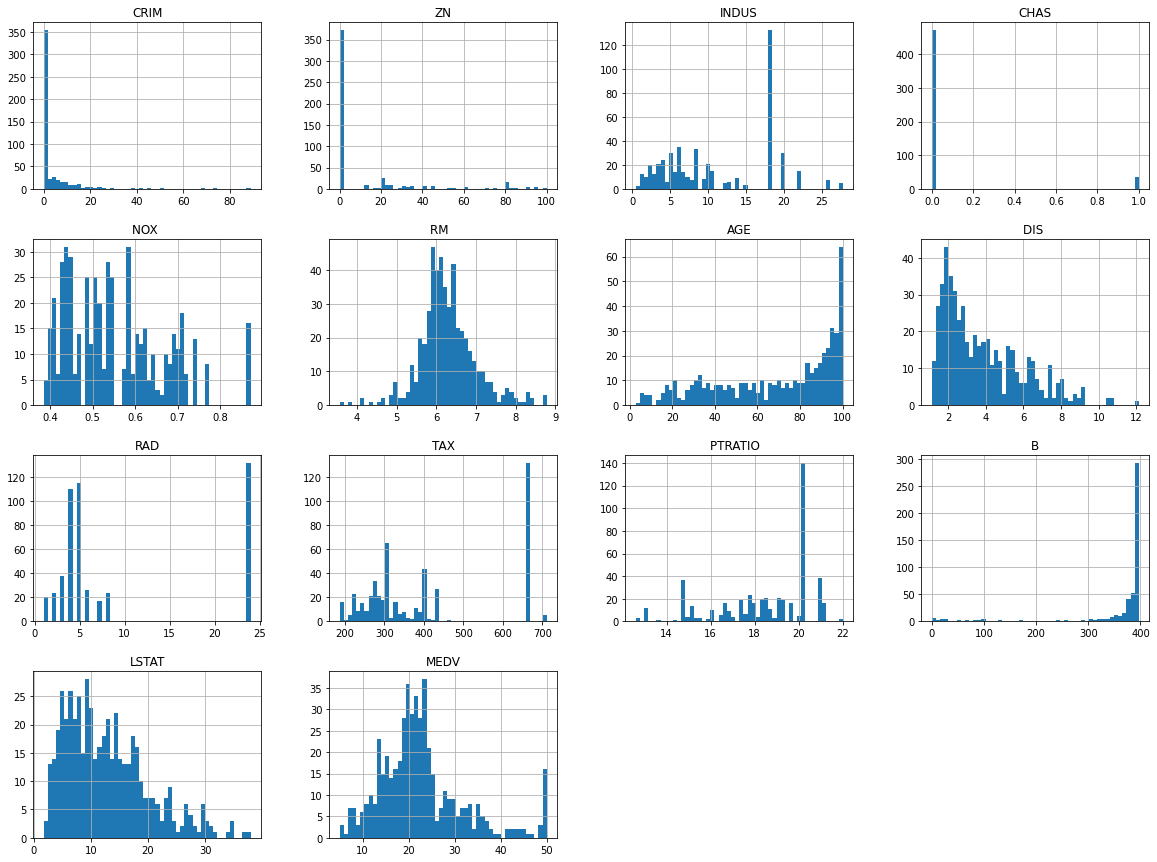

In [9]:
# For creating the histogram
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))

## Partition of test and training data

In [10]:
# import numpy as np

# def split_train_test(data, test_ratio):
#     np.random.seed(42)
#     shuffled = np.random.permutation(len(data))
#     # print(shuffled)
#     # n -> test set size.
#     n = int(len(data)*test_ratio)
#     test_idx = shuffled[:n]
#     train_idx =  shuffled[n:]
#     return data.iloc[train_idx], data.iloc[test_idx]

In [11]:
# train_set, test_set = split_train_test(housing,0.2) // this "split_train_test" is already implemented in sklearn as "train_test_split"

In [12]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

print(f"Rows in train set : {len(train_set)}\nRows in test set : {len(test_set)}\n")

Rows in train set : 404
Rows in test set : 102



In [13]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing , housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [14]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [15]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [16]:
housing = strat_train_set.copy();

## Looking For Correlations

array([[<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

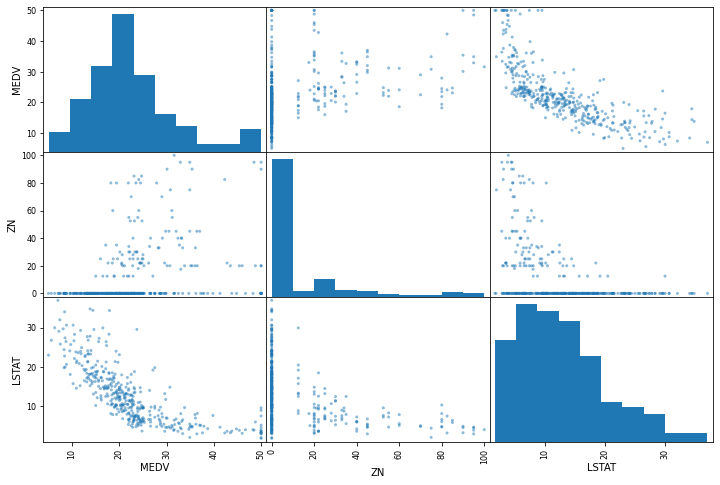

In [17]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV","ZN","LSTAT"]
scatter_matrix(housing[attributes], figsize = (12,8))

<AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>

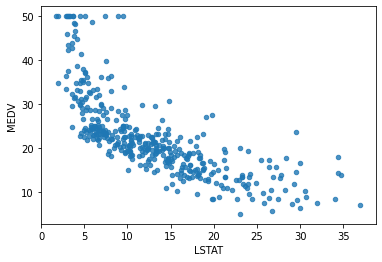

In [18]:
housing.plot(kind="scatter", x="LSTAT", y="MEDV", alpha=0.8)

In [19]:
# a = housing.dropna(subset=["RM"])
# a.shape

## Trying out Attribute Combinations

In [20]:
housing["TAX-INDUS"] = housing['TAX']/housing['INDUS']

In [21]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAX-INDUS
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,86.538462
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,139.303483
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,36.795580
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,38.888889
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,38.888889


In [22]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV         1.000000
RM           0.679894
B            0.361761
ZN           0.339741
TAX-INDUS    0.306225
DIS          0.240451
CHAS         0.205066
AGE         -0.364596
RAD         -0.374693
CRIM        -0.393715
NOX         -0.422873
TAX         -0.456657
INDUS       -0.473516
PTRATIO     -0.493534
LSTAT       -0.740494
Name: MEDV, dtype: float64

In [23]:
housing = strat_train_set.drop("MEDV", axis=1)
housing_labels = strat_train_set["MEDV"].copy()

## Missing Attributes

In [24]:
# a = housing.dropna(subset=["RM"])
# a.shape
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404 entries, 254 to 216
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CRIM       404 non-null    float64
 1   ZN         404 non-null    float64
 2   INDUS      404 non-null    float64
 3   CHAS       404 non-null    int64  
 4   NOX        404 non-null    float64
 5   RM         404 non-null    float64
 6   AGE        404 non-null    float64
 7   DIS        404 non-null    float64
 8   RAD        404 non-null    int64  
 9   TAX        404 non-null    int64  
 10  PTRATIO    404 non-null    float64
 11  B          404 non-null    float64
 12  LSTAT      404 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 44.2 KB


In [25]:
median = housing["TAX"].median()

In [26]:
median

337.0

In [27]:
housing["TAX"].fillna(median)

254    315
348    280
476    666
321    287
326    287
      ... 
155    403
423    666
98     276
455    666
216    276
Name: TAX, Length: 404, dtype: int64

In [28]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [29]:
imputer.statistics_.shape

(13,)

In [30]:
X = imputer.transform(housing)

In [31]:
housing_tr = pd.DataFrame(X, columns=housing.columns)

In [32]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279908,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712983,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.210000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## Creating a PipeLine
 

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scalar', StandardScaler()),
])

In [34]:
housing_num_tr = my_pipeline.fit_transform(housing_tr)

In [35]:
housing_num_tr.shape

(404, 13)

## Selecting a Desired Model

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# model = LinearRegression()
# model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(housing_num_tr, housing_labels)

RandomForestRegressor()

In [37]:
some_data = housing.iloc[:5]

In [38]:
some_labels = housing_labels.iloc[:5]

In [39]:
prepared_data = my_pipeline.transform(some_data)

In [40]:
model.predict(prepared_data)

array([22.289, 25.594, 16.577, 23.259, 23.453])

In [41]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

## Evaluating the model

In [42]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_predictions)
rmse = np.sqrt(mse)

In [43]:
rmse

1.2213840246390821

In [44]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [45]:
rmse_scores

array([2.95289879, 2.75040009, 4.39079298, 2.5992614 , 3.6762905 ,
       2.51456224, 4.68239169, 3.29125672, 3.20061269, 3.03986456])

In [46]:
def print_score(scores) :
    print("Score ", scores)
    print("Mean ", scores.mean())
    print("Standard Deviation", scores.std())

In [47]:
print_score(rmse_scores)

Score  [2.95289879 2.75040009 4.39079298 2.5992614  3.6762905  2.51456224
 4.68239169 3.29125672 3.20061269 3.03986456]
Mean  3.3098331674216235
Standard Deviation 0.6963888887572225


## Saving the Model

In [48]:
from joblib import dump,load
dump(model, 'itr.joblib')

['itr.joblib']

## Testing the model on test data

In [51]:
X_test = strat_test_set.drop("MEDV", axis=1)
Y_test = strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_predictions, list(Y_test))

[24.801 11.259 25.541 22.047 18.708 14.876 19.83  14.226 31.342 41.793
 19.349 11.512 23.999 28.078 19.617 11.554 31.737 14.332 23.334 19.577
 19.802 17.32  17.858 21.973 18.996 30.942 15.965 33.387  8.707 33.17
 23.887 21.444 23.151 10.833 20.622 10.935 43.114 24.634 23.873 42.656
 24.386 30.461 20.315 20.61  18.88  33.343 44.634 20.086 20.095 21.824
 21.337 14.396 21.258 15.012 25.317 33.265 42.799 29.626 18.657 20.772
 47.518 10.074 18.97  25.322 14.896 33.315 19.885 18.105 19.018 34.076
 26.213 22.872 21.508 22.596 34.268 12.518 15.88  19.895 20.684 21.286
 22.523 21.022 14.096 22.692 20.685 21.192 14.027 21.133 21.917 23.272
 18.551 27.325  7.173 26.451 18.648 29.554 19.621 31.456 14.849 26.927
 21.319 20.572] [16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.0, 7.2, 34.6, 20.1, 20.6, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.0, 28.1, 31.0, 21.7, 23.4, 19.5, 33.1,

In [50]:
final_rmse

2.9109407380419388

In [52]:
prepared_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24141041, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])